In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import pathlib, os, random, math
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pathlib
os.environ['DIR'] = "C:\\Users\\kunta\\Dropbox\\abc\\Automated-Shopping-Cart\\Code So Far"


In [2]:

IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
train_dir="..\\dataset\\train"
train_dir = pathlib.Path(train_dir)
train_dir

WindowsPath('../dataset/train')

In [4]:
train_images_dict={}
train_labels_dict={}
count=0
for i in list(train_dir.glob("*")):
    for j in i.glob("*"):
        key=str(j).split("\\")[-1].lower()
        vals=list(j.glob("*"))
        train_images_dict[key]=vals
        train_labels_dict[key]=count
        count+=1


In [5]:
s1=set()
for i in list(train_images_dict.keys()):
    s1.add(i.lower())
fruits=["apple","banana","custard_apple","fig","grape","jackfruit","mango","orange","papaya","pear","pineapple","strawberry","watermelon"]
vegetables=list(s1.difference(set(fruits)))



In [ ]:
# import shutil
# # from socket import SHUT_RD
# dirs=["test","train","val"]
# for m in dirs:
#     temp_dir="..\\dataset\\"+str(m)
#     temp_dir = pathlib.Path(temp_dir)
#     os.mkdir(str(temp_dir)+"\\fruits") 
#     os.mkdir(str(temp_dir)+"\\vegetables")   
#     for i in list(temp_dir.glob("*")):
#         name=str(i).split("\\")[-1]    
#         if(name.lower() in fruits):
#             source_folder = str(i)
#             destination_folder = str(temp_dir)+"\\fruits"
#             shutil.move(source_folder,destination_folder)
#         elif(name.lower() in vegetables):
#             source_folder = str(i)
#             destination_folder = str(temp_dir)+"\\vegetables"
#             shutil.move(source_folder,destination_folder)


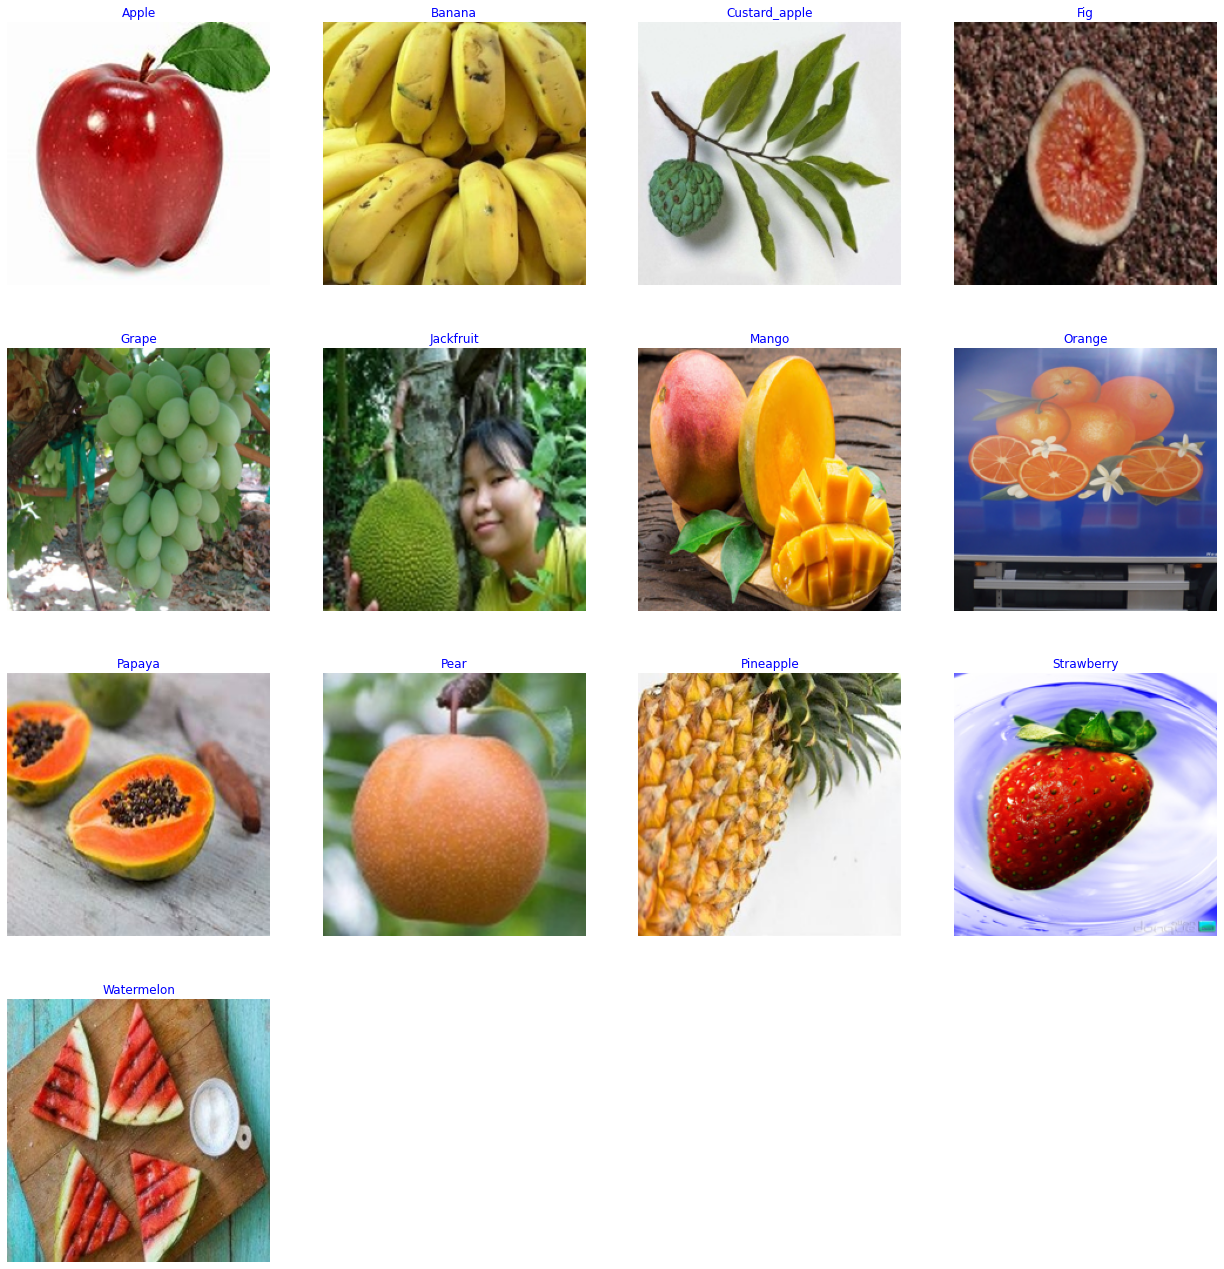

In [6]:
from turtle import color
fig = plt.figure(figsize=(224,224))
rows=10
columns=4
count=0
for i in train_images_dict:
    if(i.lower() in fruits):
        count+=1
        im1=Image.open(str(train_images_dict[i][0])).resize((224,224))        
        fig.add_subplot(rows, columns, count)
        plt.imshow(im1)
        plt.subplots_adjust(bottom=0.1,right=0.2,top=0.3,hspace=0.1)
        plt.axis('off')
        plt.title(i.capitalize(),color="blue")


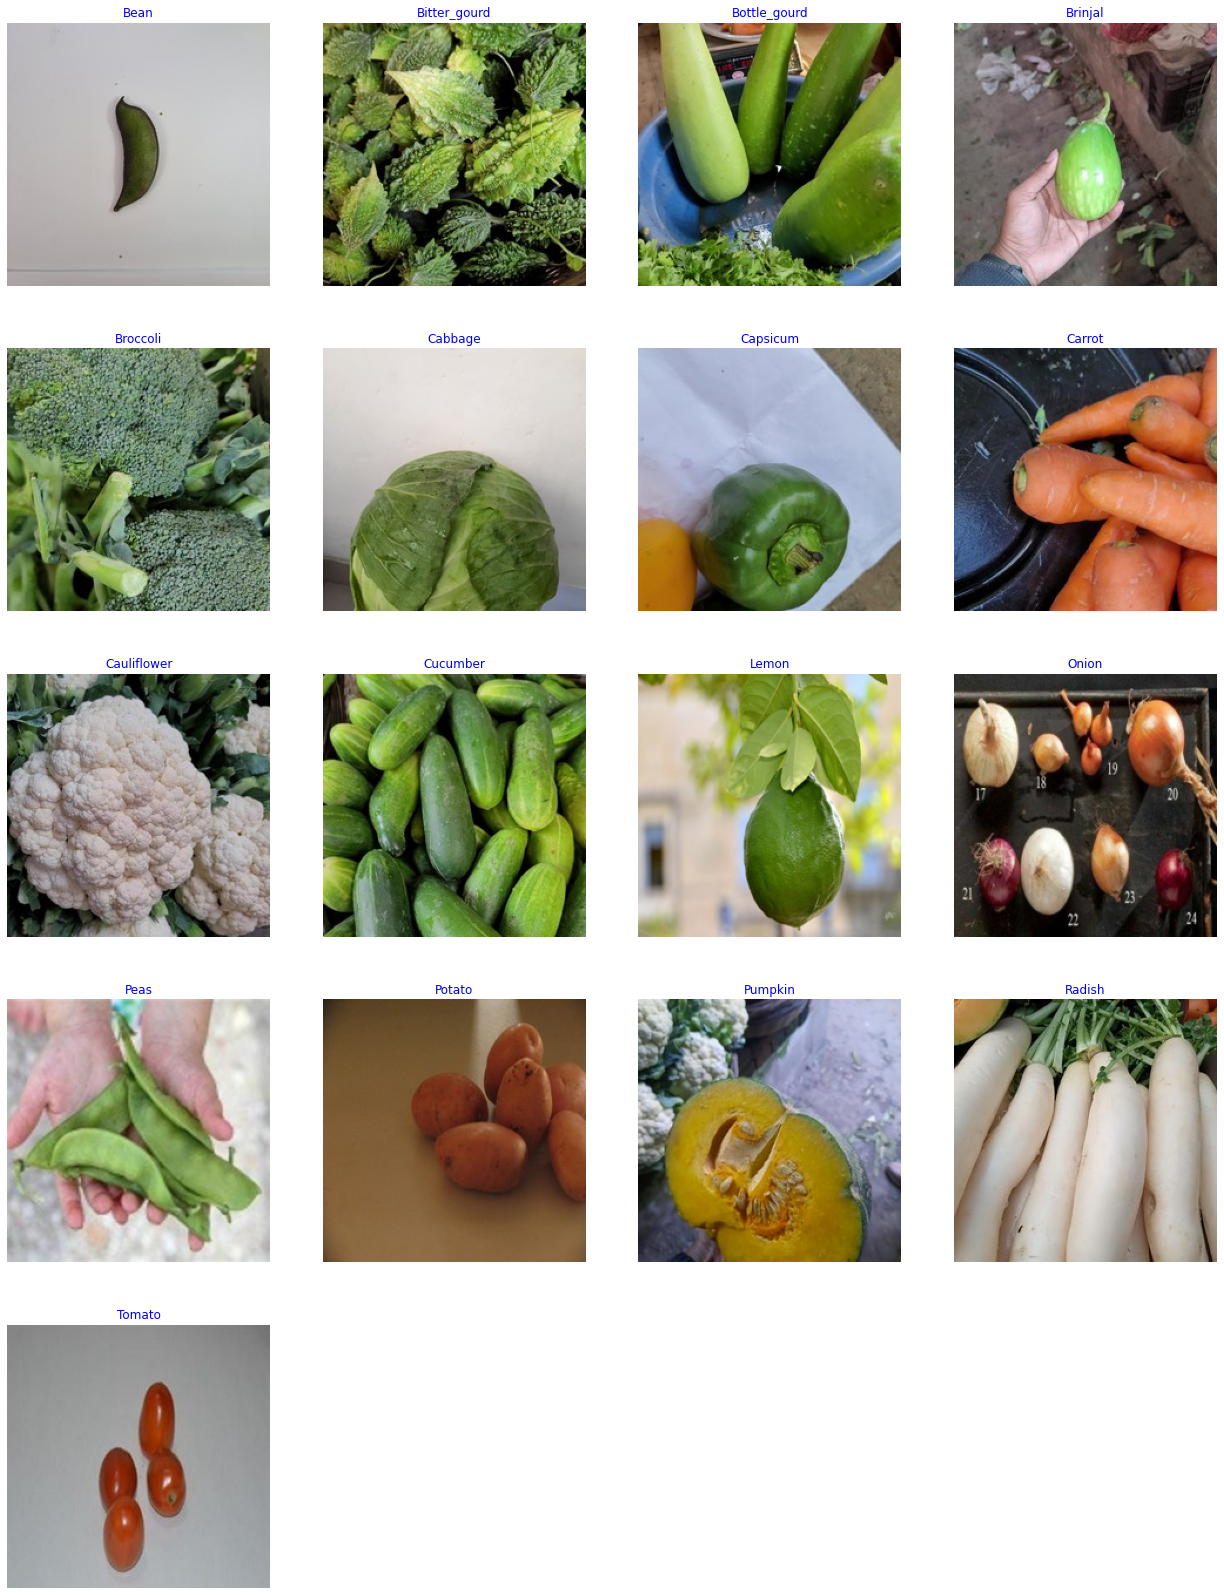

In [7]:
count=0 
fig1 = plt.figure(figsize=(224,224))
for i in train_images_dict:
    if(i.lower() in vegetables):
        count+=1
        im1=Image.open(str(train_images_dict[i][0])).resize((224,224))
        fig1.add_subplot(rows, columns, count)        
        plt.imshow(im1)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1,right=0.2,top=0.3,hspace=0.1)
        plt.title(i.capitalize(),color="blue")

In [8]:
X_train, y_train = [], []

for name, images in train_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        # print(img)
        try:
            resized_img = cv2.resize(img,(224,224))
            X_train.append(resized_img)
            y_train.append(train_labels_dict[name])
        except Exception as e: 
            fp=open("errorlogs.txt","a+")
            stri="Error as"+str(e)+"\nOccuring for filename"+str(image)+"Name is"+name
            fp.write(stri)
            fp.close()

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
#X_train

In [11]:
y_train

array([ 0,  0,  0, ..., 29, 29, 29])

In [12]:
val_dir="..\\dataset\\val"
val_dir = pathlib.Path(val_dir)
val_images_dict={}
val_labels_dict={}
count=0
for i in list(val_dir.glob("*")):
    for j in i.glob("*"):
        key=str(j).split("\\")[-1].lower()
        vals=list(j.glob("*"))
        val_images_dict[key]=vals
        val_labels_dict[key]=count
        count+=1

X_val, y_val = [], []
for name, images in val_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
            resized_img = cv2.resize(img,(224,224))
            X_val.append(resized_img)
            y_val.append(val_labels_dict[name])
        except Exception as e: 
            fp=open("errorlogs.txt","a+")
            stri="Error as"+str(e)+"\nOccuring for filename"+str(image)+"Name is"+name
            fp.write(stri)
            fp.close()

X_val = np.array(X_val)
y_val = np.array(y_val)

In [13]:
test_dir="..\\dataset\\test"
test_dir = pathlib.Path(test_dir)
test_images_dict={}
test_labels_dict={}
count=0
for i in list(test_dir.glob("*")):
    for j in i.glob("*"):
        key=str(j).split("\\")[-1].lower()
        tests=list(j.glob("*"))
        test_images_dict[key]=tests
        test_labels_dict[key]=count
        count+=1

X_test, y_test = [], []
for name, images in test_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        try:
            resized_img = cv2.resize(img,(224,224))
            X_test.append(resized_img)
            y_test.append(test_labels_dict[name])
        except Exception as e: 
            fp=open("errorlogs.txt","a+")
            stri="Error as"+str(e)+"\nOccuring for filename"+str(image)+"Name is"+name
            fp.write(stri)
            fp.close()

X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:

predicted = classifier.predict(np.array([X_train[169],X_train[170],X_train[171]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 555ms/step


array([722, 795, 444], dtype=int64)

In [15]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'C:\\Users\\kunta\\.keras\\datasets\\ImageNetLabels.txt'

In [16]:

image_labels = []
with open("C:\\Users\\kunta\\.keras\\datasets\\ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[722]


'pillow'

In [14]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [15]:
num_of_classes = 30
model = tf.keras.Sequential([pretrained_model_without_top_layer,tf.keras.layers.Dense(num_of_classes)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 30)                38430     
                                                                 
Total params: 2,296,414
Trainable params: 38,430
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['sparse_categorical_accuracy'])
model.fit(X_train, y_train, epochs=1,validation_data=(X_val,y_val))

780/780 [==============================] - 586s 742ms/step - loss: 1.8648 - sparse_categorical_accuracy: 0.4901 - val_loss: 1.4212 - val_sparse_categorical_accuracy: 0.6121


In [17]:
model.evaluate(X_test,y_test)

191/191 [==============================] - 110s 579ms/step - loss: 1.6033 - sparse_categorical_accuracy: 0.5455


[1.6033496856689453, 0.5455292463302612]

In [18]:
model.evaluate(X_val,y_val)

147/147 [==============================] - 93s 637ms/step - loss: 1.4212 - sparse_categorical_accuracy: 0.6121


[1.4211645126342773, 0.6121276617050171]